# Analizaremos los dataset que nos entrego César M

Realizaremos el análisis para los tiempos de colas, considerando ambas opciones, es decir enfocandonos en la columna Start Cola y End Cola. De esta manera buscamos realizar una comparativa contra el  tiempo de actividad mostrado en la entrega 2 a SQM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import seaborn as sns

actividad = pd.read_csv('actividad.csv')
actividad = actividad.drop('Unnamed: 0',axis=1)
colas = pd.read_csv('colas.csv')
colas = colas.drop('Unnamed: 0',axis=1)

cols = ['Total Time','Datei','Datef','Ti','Tf']
actividad = actividad.drop(cols,axis=1)
actividad['Start Act'] = pd.to_datetime(actividad['Start Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['End Act'] = pd.to_datetime(actividad['End Act'], utc = True).dt.tz_convert('Chile/Continental')
actividad['date start'] = pd.to_datetime(actividad['Start Act']).dt.date
actividad['date end'] = pd.to_datetime(actividad['End Act']).dt.date
actividad['time start'] = pd.to_datetime(actividad['Start Act']).dt.time
actividad['time end'] = pd.to_datetime(actividad['End Act']).dt.time
actividad['Day of year [In]'] = pd.to_datetime(actividad['Start Act']).dt.dayofyear
actividad['Day of year [Out]'] = pd.to_datetime(actividad['End Act']).dt.dayofyear
actividad['time Act'] = ((actividad['End Act']) - pd.to_datetime(actividad['Start Act']))/np.timedelta64(1, 's')



#colas = colas.drop(cols,axis=1)
colas['Start Cola'] = pd.to_datetime(colas['Start Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas['End Cola'] = pd.to_datetime(colas['End Cola'], utc = True).dt.tz_convert('Chile/Continental')
colas['date start'] = pd.to_datetime(colas['Start Cola']).dt.date
colas['date end'] = pd.to_datetime(colas['End Cola']).dt.date
colas['time start'] = pd.to_datetime(colas['Start Cola']).dt.time
colas['time end'] = pd.to_datetime(colas['End Cola']).dt.time
colas['Day of year [In]'] = pd.to_datetime(colas['Start Cola']).dt.dayofyear
colas['Day of year [Out]'] = pd.to_datetime(colas['End Cola']).dt.dayofyear
colas['time cola'] = ((colas['End Cola']) - pd.to_datetime(colas['Start Cola']))/np.timedelta64(1, 's')

In [2]:
actividad

ID          Origin     Destination Product              ZO  \
0       10573795  Nueva Victoria        Coya Sur    SNIT       C NPT 1-2   
1        9718456  Nueva Victoria        Coya Sur    SNIT       C NPT 1-2   
2        9540270  Nueva Victoria        Coya Sur    SNIT       C NPT 1-2   
3        9686854        Coya Sur  Nueva Victoria     NaN       C NPT 1-2   
4        9585867        Coya Sur  Nueva Victoria     NaN       C NPT 1-2   
...          ...             ...             ...     ...             ...   
260276  11299565        Coya Sur        Coya Sur     NaN  Romana Salitre   
260277  11298341       Tocopilla        Coya Sur     NaN  Romana Salitre   
260278   9567248        Coya Sur       Tocopilla   SSA-J  Romana Salitre   
260279   9567248        Coya Sur       Tocopilla   SSA-J  Romana Salitre   
260280   9567248        Coya Sur       Tocopilla   SSA-J  Romana Salitre   

                       Start Act                   End Act  date start  \
0      2019-07-01 05:00:15-04:00 2019-07-01 05:09:42-04:00  2019-07-01   
1      2019-07-01 05:11:03-04:00 2019-07-01 05:17:33-04:00  2019-07-01   
2      2019-07-01 04:47:15-04:00 2019-07-01 05:03:51-04:00  2019-07-01   
3      2019-07-01 06:31:49-04:00 2019-07-01 06:40:49-04:00  2019-07-01   
4      2019-07-01 06:40:17-04:00 2019-07-01 06:46:40-04:00  2019-07-01   
...                          ...                       ...         ...   
260276 2020-01-07 15:15:48-03:00 2020-01-07 15:34:27-03:00  2020-01-07   
260277 2019-12-23 19:43:41-03:00 2019-12-23 20:04:27-03:00  2019-12-23   
260278 2019-11-03 07:29:27-03:00 2019-11-03 07:32:27-03:00  2019-11-03   
260279 2019-11-03 07:35:27-03:00 2019-11-03 07:44:27-03:00  2019-11-03   
260280 2019-11-03 09:10:32-03:00 2019-11-03 10:09:35-03:00  2019-11-03   

          date end time start  time end  Day of year [In]  Day of year [Out]  \
0       2019-07-01   05:00:15  05:09:42               182                182   
1       2019-07-01   05:11:03  05:17:33               182                182   
2       2019-07-01   04:47:15  05:03:51               182                182   
3       2019-07-01   06:31:49  06:40:49               182                182   
4       2019-07-01   06:40:17  06:46:40               182                182   
...            ...        ...       ...               ...                ...   
260276  2020-01-07   15:15:48  15:34:27                 7                  7   
260277  2019-12-23   19:43:41  20:04:27               357                357   
260278  2019-11-03   07:29:27  07:32:27               307                307   
260279  2019-11-03   07:35:27  07:44:27               307                307   
260280  2019-11-03   09:10:32  10:09:35               307                307   

        time Act  
0          567.0  
1          390.0  
2          996.0  
3          540.0  
4          383.0  
...          ...  
260276    1119.0  
260277    1246.0  
260278     180.0  
260279     540.0  
260280    3543.0  

[260281 rows x 14 columns]

In [3]:
colas

ID     Origin       Destination      Product  \
0                 8896301   Coya Sur         Tocopilla  NPC-TA 50 H   
1                10974795  Tocopilla          Coya Sur          NaN   
2                10974843  Tocopilla          Coya Sur          NaN   
3                10243183  Tocopilla          Coya Sur          NaN   
4                 8896430  Tocopilla          Coya Sur          NaN   
...                   ...        ...               ...          ...   
260276           17604788  Tocopilla          Coya Sur          NaN   
260277           17649496  Tocopilla          Coya Sur          NaN   
260278  17814280-17846287   Coya Sur         Tocopilla  QROP-K PLUS   
260279           17848160   Coya Sur  Salar de Atacama          NaN   
260280           18029619  Tocopilla          Coya Sur          NaN   

                   ZO                Start Cola                  End Cola  \
0        C Secado L-3 2019-07-05 10:27:09-04:00 2019-07-05 11:02:11-04:00   
1        C Secado L-3 2019-07-05 16:33:32-04:00 2019-07-05 16:31:59-04:00   
2        C Secado L-3 2019-07-06 14:48:48-04:00 2019-07-06 14:48:48-04:00   
3        C Secado L-3 2019-07-07 13:07:28-04:00 2019-07-07 13:16:47-04:00   
4        C Secado L-3 2019-07-07 13:29:12-04:00 2019-07-07 13:29:12-04:00   
...               ...                       ...                       ...   
260276  C Granulacion 2020-05-15 15:35:24-04:00 2020-05-15 15:44:24-04:00   
260277  C Granulacion 2020-05-16 16:22:07-04:00 2020-05-16 16:30:31-04:00   
260278  C Granulacion 2020-05-20 10:17:10-04:00 2020-05-20 10:26:48-04:00   
260279  C Granulacion 2020-05-21 04:02:27-04:00 2020-05-21 10:28:57-04:00   
260280  C Granulacion 2020-05-25 07:13:39-04:00 2020-05-25 08:06:53-04:00   

        date start    date end time start  time end  Day of year [In]  \
0       2019-07-05  2019-07-05   10:27:09  11:02:11               186   
1       2019-07-05  2019-07-05   16:33:32  16:31:59               186   
2       2019-07-06  2019-07-06   14:48:48  14:48:48               187   
3       2019-07-07  2019-07-07   13:07:28  13:16:47               188   
4       2019-07-07  2019-07-07   13:29:12  13:29:12               188   
...            ...         ...        ...       ...               ...   
260276  2020-05-15  2020-05-15   15:35:24  15:44:24               136   
260277  2020-05-16  2020-05-16   16:22:07  16:30:31               137   
260278  2020-05-20  2020-05-20   10:17:10  10:26:48               141   
260279  2020-05-21  2020-05-21   04:02:27  10:28:57               142   
260280  2020-05-25  2020-05-25   07:13:39  08:06:53               146   

        Day of year [Out]  time cola  
0                     186     2102.0  
1                     186      -93.0  
2                     187        0.0  
3                     188      559.0  
4                     188        0.0  
...                   ...        ...  
260276                136      540.0  
260277                137      504.0  
260278                141      578.0  
260279                142    23190.0  
260280                146     3194.0  

[260281 rows x 14 columns]

# La idea es contabilizar los camiones en espera en ese periodo en particular.

En primera instancia tomaremos todos los destinos en un determinado bloque 

In [4]:
def block(df,date_inicial,date_final,time_inicial,time_final,condicion=0):
    """ A grandes rasgos esto es lo que hace la función block_generator parra el dataset original"""
    if condicion == 'start':
        df = df[(df['Day of year [In]'] >= date_inicial)  & (df['Day of year [In]'] <= date_final) & (df['time start'] >= time_inicial) & (df['time start'] <= time_final)]
    elif condicion == 'end':
        df = df[(df['Day of year [Out]'] >= date_inicial)  & (df['Day of year [Out]'] <= date_final) & (df['time end'] >= time_inicial) & (df['time end'] <= time_final)]
    else:
        print("ingrese una opcion valida, 'start' o 'end', se devuelve el df incial ")
    return df


def vehiculos_cola(df,date_inicial,date_final,inicio=1,fin=25,condition='end'):
    """Generamos un diccionario que contenga zona: {bloque hr: vehiculos en ella} """
    diccionario = {}
    for i in range(inicio,fin):
        start = [i-1,0,0]
        if(i == 24):
            end = [23,59,59]
        else:
            end = [i,0,0]

        time_start = datetime.time(start[0], start[1], start[2])
        time_end = datetime.time(end[0], end[1], end[2])
        df_ = block(df,date_inicial,date_final,time_start,time_end,condition)
        
        for zo in df_['ZO'].unique().tolist(): 
            block_filtered = df_[df_['ZO'] == zo]
            vehiculos_in = block_filtered.shape[0]
            if zo == 'Salida':
                continue
            else:
                if zo in diccionario.keys():
                    diccionario[zo].update({i:vehiculos_in})
                else:
                    diccionario.update({zo:{i:vehiculos_in}})
    return diccionario


def dict_to_df(dictionary):
    """ Pasamos de Dicionario a df de la forma que nosotros necesitamos"""
    
    zonas = ['Romana Salitre', 'C Secado L-4', 'C PTS', 'C NPT3', 'Romana Mto', 'C ATM', 'C NPT 1-2', 'C Prilado', 'Losa Envasado', 'C CS-4',
     'C Secado L-3', 'C Granulacion', 'Galpones', 'C NPT4', 'C CS-12', 'C CS-P.Valdivia', 'Romana 3', 'C CS-11']
    test = np.arange(1,25,1)
    count=0
    for k, v in dictionary.items():
        
        a = pd.DataFrame.from_dict(v,'index')
        a = a.rename(columns={a.columns[0]:k})
        for i in test:
            if i not in a.index:
                #print("no esta este indice", i)
                a.loc[i] = 0.
        a = a.sort_index(axis=0)
        if (count == 0):
            b = a
            count +=1
            continue 
        else:
            b=pd.concat([b,a],axis=1)
    b = b.fillna(0.)
    cols_b = b.keys().tolist()
    diff = list(set(zonas) - set(cols_b))
    if (len(diff) > 0):
        for i in diff:
            b[i] = 0.
    
    b = b.reindex(sorted(b.columns), axis=1)
    return b

def analisis_por_dia(df,dia_inicial,dia_final,hora_incial=1,hora_final=25,name=None,condicion='end',metric='max'):
    "Nos entrega el análisis por una cantidad X de dias, toma los días del año"
    count = 0
    df_final = None
    for i in range(dia_inicial,dia_final+1):
        #print(i)
        aux = dict_to_df(vehiculos_cola(df,i,i,1,25,condicion))
        if count == 0:
            df_final = aux
            count += 1
        else:
            if (metric == 'max'):
                df_final = pd.concat([df_final, aux]).max(level=0)   #Aquí indico que necesito los peaks
            elif (metric == 'mean'):
                df_final = pd.concat([df_final,aux]).mean(level=0)
    if name != None:
        df_final.sort_index(axis=0).to_csv(name,index=False)
    return df_final.sort_index(axis=0)

In [5]:
#Testeamos la adaptación
inicial = 1
final = 1
aux = analisis_por_dia(colas,1,1,1,25,None,condicion='end',metric='max')
aux

C ATM  C CS-11  C CS-12  C CS-4  C CS-P.Valdivia  C Granulacion  \
1     0.0      0.0      0.0     4.0              0.0            0.0   
2     0.0      0.0      0.0     5.0              0.0            0.0   
3     0.0      0.0      0.0     6.0              0.0            0.0   
4     0.0      0.0      0.0     2.0              0.0            0.0   
5     0.0      0.0      0.0     0.0              0.0            0.0   
6     0.0      0.0      0.0     3.0              0.0            0.0   
7     0.0      0.0      0.0     7.0              0.0            0.0   
8     0.0      0.0      0.0     7.0              0.0            0.0   
9     0.0      0.0      0.0     4.0              0.0            0.0   
10    0.0      0.0      0.0     8.0              0.0            0.0   
11    0.0      0.0      0.0     3.0              0.0            0.0   
12    0.0      0.0      0.0     6.0              0.0            0.0   
13    0.0      0.0      0.0     9.0              0.0            0.0   
14    0.0      0.0      0.0    10.0              0.0            0.0   
15    0.0      0.0      0.0     7.0              0.0            0.0   
16    0.0      0.0      0.0     8.0              0.0            0.0   
17    0.0      0.0      0.0     3.0              0.0            0.0   
18    0.0      0.0      0.0     3.0              0.0            0.0   
19    0.0      0.0      0.0    16.0              0.0            0.0   
20    0.0      0.0      0.0    13.0              0.0            0.0   
21    0.0      0.0      0.0    14.0              0.0            0.0   
22    0.0      0.0      0.0    11.0              0.0            0.0   
23    0.0      0.0      0.0     8.0              0.0            0.0   
24    0.0      0.0      0.0     8.0              0.0            0.0   

    C NPT 1-2  C NPT3  C NPT4  C PTS  C Prilado  C Secado L-3  C Secado L-4  \
1         0.0     0.0     2.0    0.0        0.0           0.0           6.0   
2         2.0     0.0     1.0    0.0        0.0           0.0           3.0   
3         2.0     0.0     2.0    0.0        0.0           0.0           5.0   
4         2.0     0.0     1.0    0.0        0.0           0.0           2.0   
5         0.0     0.0     0.0    0.0        0.0           0.0           0.0   
6         0.0     2.0     0.0    0.0        0.0           0.0           2.0   
7         0.0     0.0     0.0    0.0        2.0           0.0           3.0   
8         0.0     1.0     0.0    0.0        2.0           0.0           3.0   
9         2.0     2.0     0.0    0.0        0.0           0.0           3.0   
10        2.0     2.0     5.0    0.0        0.0           0.0           2.0   
11        0.0     0.0     0.0    0.0        1.0           0.0           4.0   
12        0.0     0.0     2.0    0.0        0.0           0.0           3.0   
13        2.0     0.0     4.0    0.0        0.0           0.0           4.0   
14        1.0     0.0     5.0    0.0        3.0           0.0           3.0   
15        5.0     0.0     3.0    0.0        6.0           0.0           5.0   
16        2.0     0.0     2.0    0.0        2.0           0.0           4.0   
17        0.0     1.0     0.0    0.0        0.0           0.0           0.0   
18        0.0     1.0     0.0    0.0        0.0           0.0           1.0   
19        0.0     5.0     3.0    0.0        0.0           0.0           9.0   
20        2.0     5.0     5.0    0.0        1.0           0.0           4.0   
21        1.0     3.0     8.0    0.0        1.0           0.0           5.0   
22        1.0     0.0     4.0    0.0        0.0           0.0           1.0   
23        0.0     0.0     0.0    0.0        0.0           0.0           1.0   
24        1.0     0.0     4.0    0.0        0.0           0.0           1.0   

    Galpones  Losa Envasado  Romana 3  Romana Mto  Romana Salitre  
1        0.0            0.0       0.0         0.0             7.0  
2        0.0            0.0       0.0         2.0             4.0  
3        0.0            0.0       0.0         2.

# Procedemos a analizar por el mes de Enero las colas.

Haremos una comparativa de considerar el "start"  o en "end" de las colas, para ver cual tiene más sentido para comparar con nuestros resultados

In [6]:
enero_peaks_cola = analisis_por_dia(colas,1,31,1,25,None,condicion='end',metric='max')
enero_peaks_cola_start = analisis_por_dia(colas,1,31,1,25,None,condicion='start',metric='max')
enero_mean_cola = analisis_por_dia(colas,1,31,1,25,None,condicion='end',metric='mean')
enero_peaks_act = analisis_por_dia(actividad,1,31,1,25,None,condicion='end',metric='max')

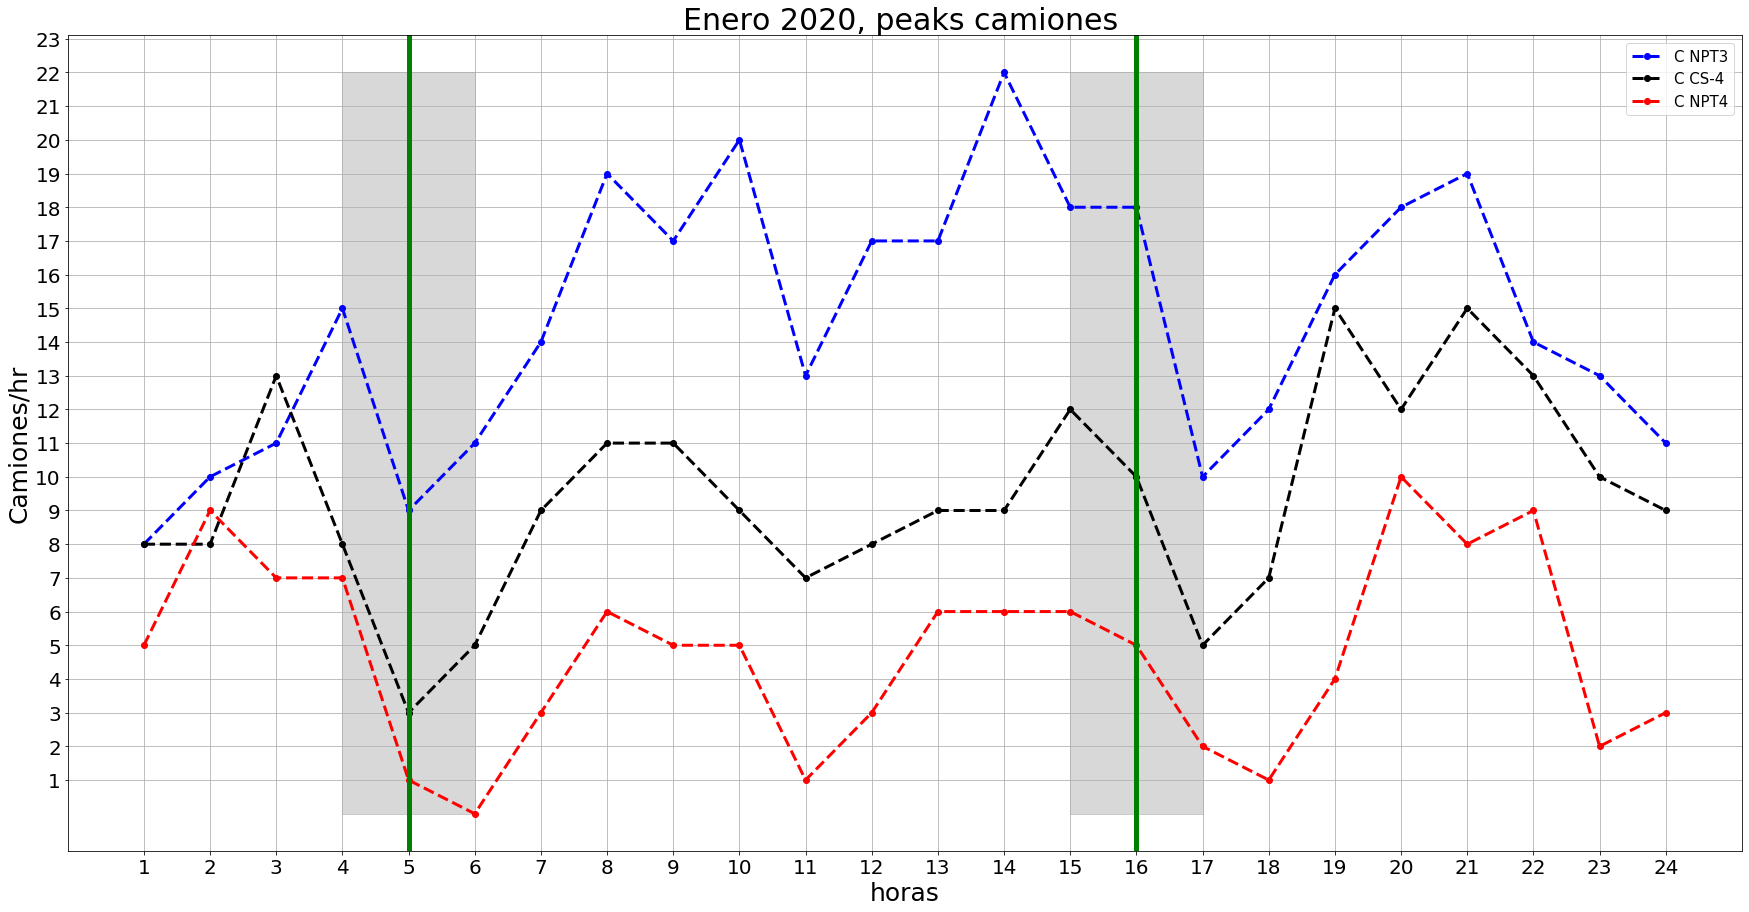

In [7]:
plt.figure(figsize=(30,15))
plt.plot(enero_peaks_act["C NPT3"],'bo--',lw=3,label='C NPT3')
plt.plot(enero_peaks_act["C CS-4"],'ko--',lw=3,label='C CS-4')
plt.plot(enero_peaks_act["C NPT4"],'ro--',lw=3,label='C NPT4')
plt.title("Enero 2020, peaks camiones ",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(1,25,1),fontsize=20)
plt.axvline(x=16,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')

plt.fill_between((4,6), 0, 22,color='gray', alpha=0.3)
plt.legend(fontsize=15)
plt.grid(True)
plt.fill_between((15,17), 0, 22,color='gray', alpha=0.3)
#plt.savefig("Analisis_enero_prom.png")
plt.show()

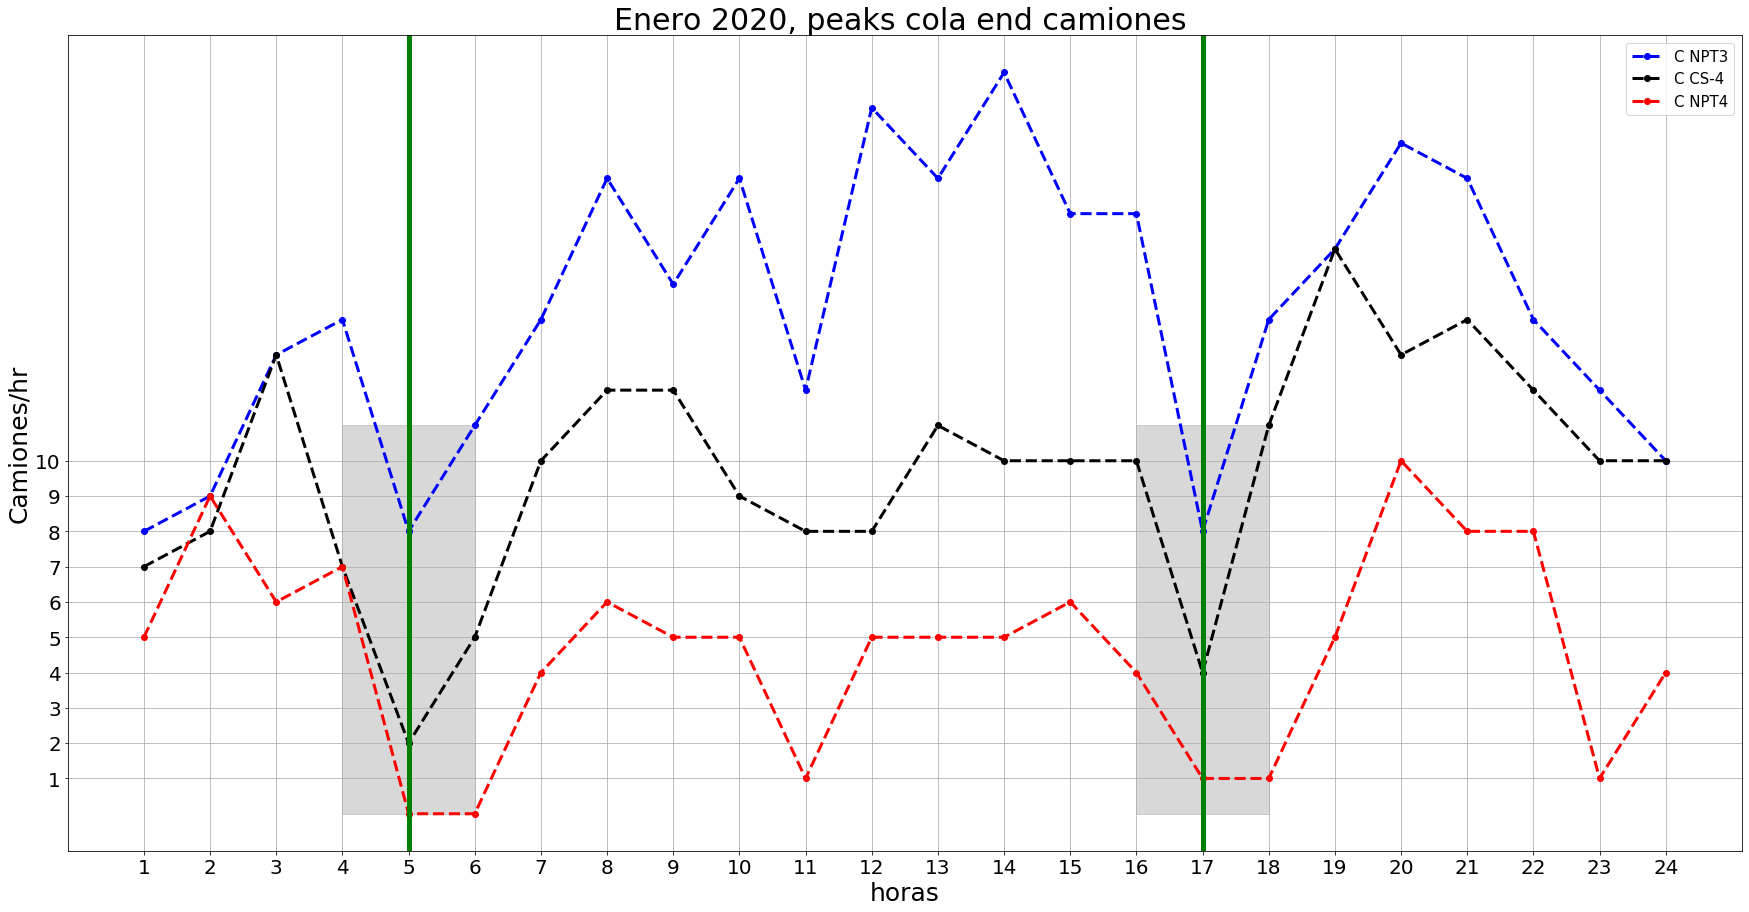

In [8]:
plt.figure(figsize=(30,15))
plt.plot(enero_peaks_cola["C NPT3"],'bo--',lw=3,label='C NPT3')
plt.plot(enero_peaks_cola["C CS-4"],'ko--',lw=3,label='C CS-4')
plt.plot(enero_peaks_cola["C NPT4"],'ro--',lw=3,label='C NPT4')
plt.title("Enero 2020, peaks cola end camiones ",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(1,11,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')

plt.fill_between((4,6), 0, 11,color='gray', alpha=0.3)
plt.legend(fontsize=15)
plt.grid(True)
plt.fill_between((16,18), 0, 11,color='gray', alpha=0.3)
#plt.savefig("Analisis_enero_prom.png")
plt.show()

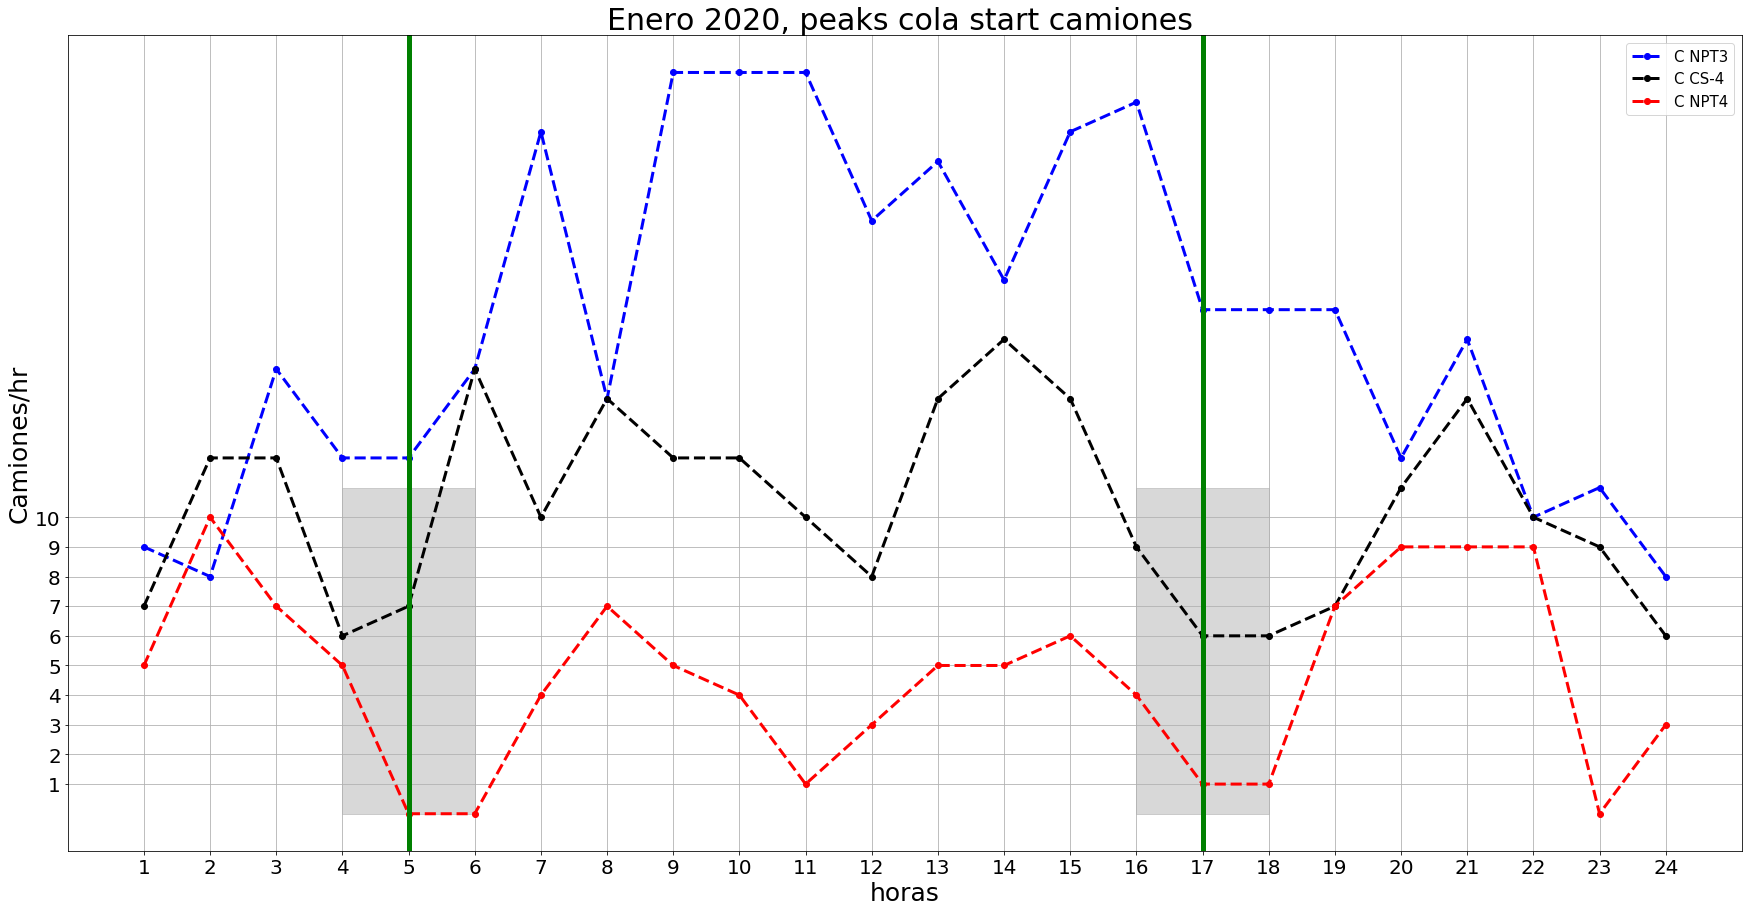

In [9]:
plt.figure(figsize=(30,15))
plt.plot(enero_peaks_cola_start["C NPT3"],'bo--',lw=3,label='C NPT3')
plt.plot(enero_peaks_cola_start["C CS-4"],'ko--',lw=3,label='C CS-4')
plt.plot(enero_peaks_cola_start["C NPT4"],'ro--',lw=3,label='C NPT4')
plt.title("Enero 2020, peaks cola start camiones ",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(1,11,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')

plt.fill_between((4,6), 0, 11,color='gray', alpha=0.3)
plt.legend(fontsize=15)
plt.grid(True)
plt.fill_between((16,18), 0, 11,color='gray', alpha=0.3)
#plt.savefig("Analisis_enero_prom.png")
plt.show()

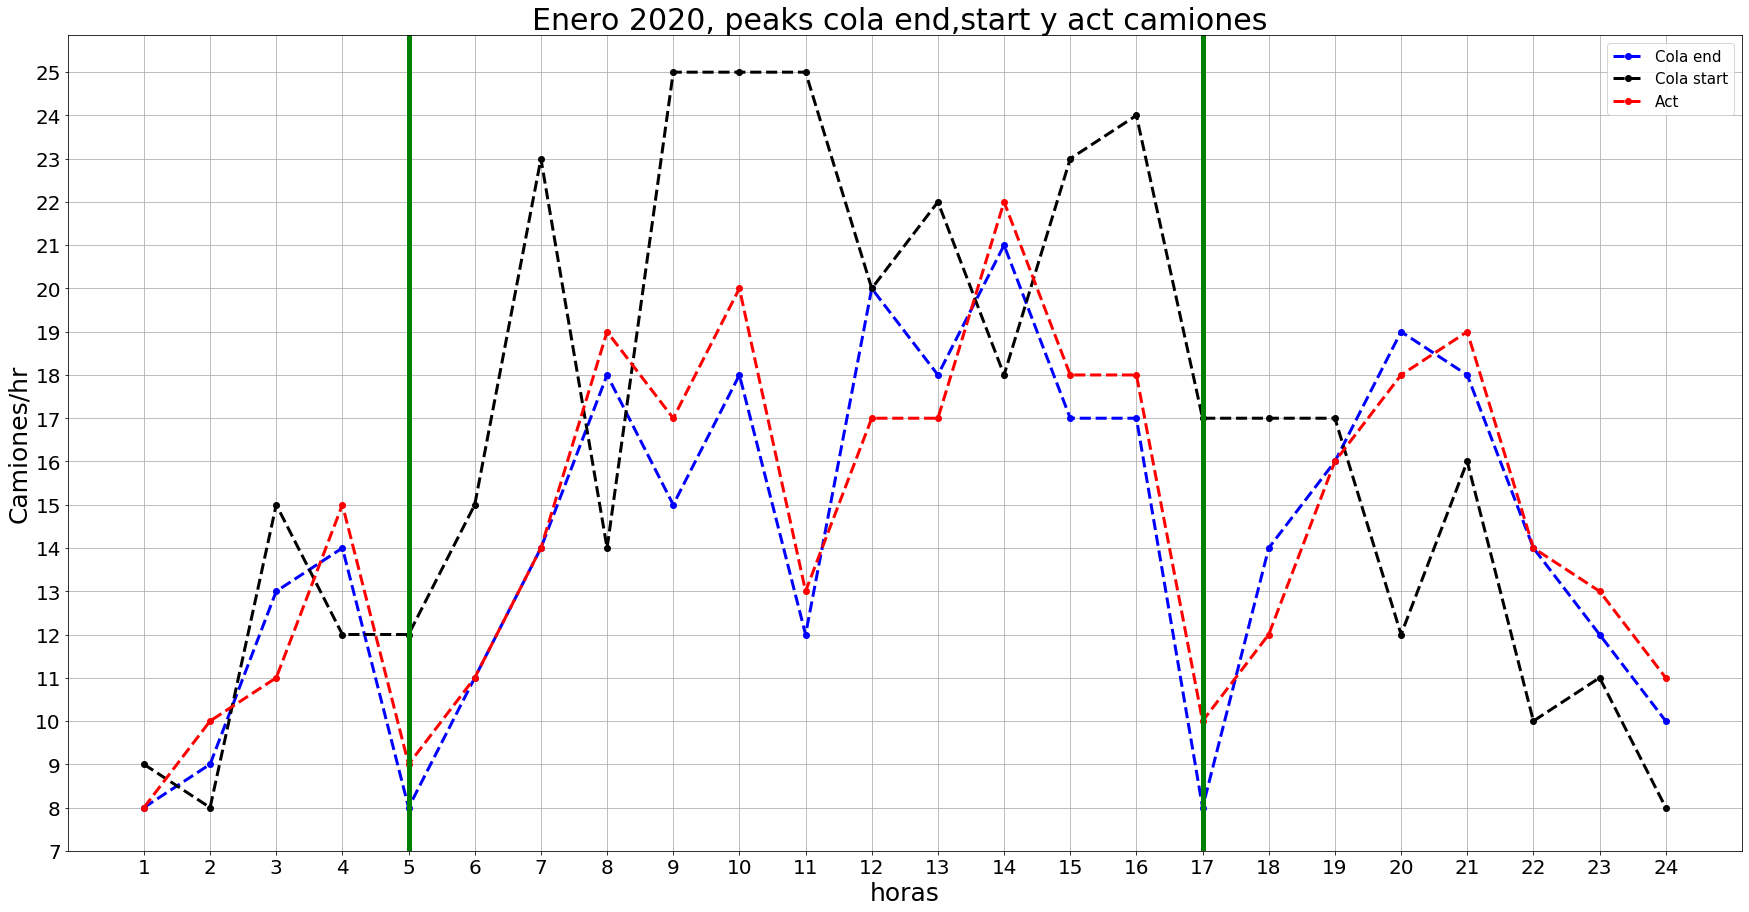

In [10]:
plt.figure(figsize=(30,15))
plt.plot(enero_peaks_cola["C NPT3"],'bo--',lw=3,label='Cola end')
plt.plot(enero_peaks_cola_start["C NPT3"],'ko--',lw=3,label='Cola start')
plt.plot(enero_peaks_act["C NPT3"],'ro--',lw=3,label='Act')
plt.title("Enero 2020, peaks cola end,start y act camiones ",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(7,26,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')

#plt.fill_between((4,6), 0, 11,color='gray', alpha=0.3)
plt.legend(fontsize=15)
plt.grid(True)
#plt.fill_between((16,18), 0, 11,color='gray', alpha=0.3)
#plt.savefig("Analisis_enero_prom.png")
plt.show()

__Me parece sospechoso lo bajo de los peaks, por ello haremos el mismo procedimiento pero ahora con la actividad, deberíamos reobtener el gráfico rojo que yo obtuve con mi dataset__

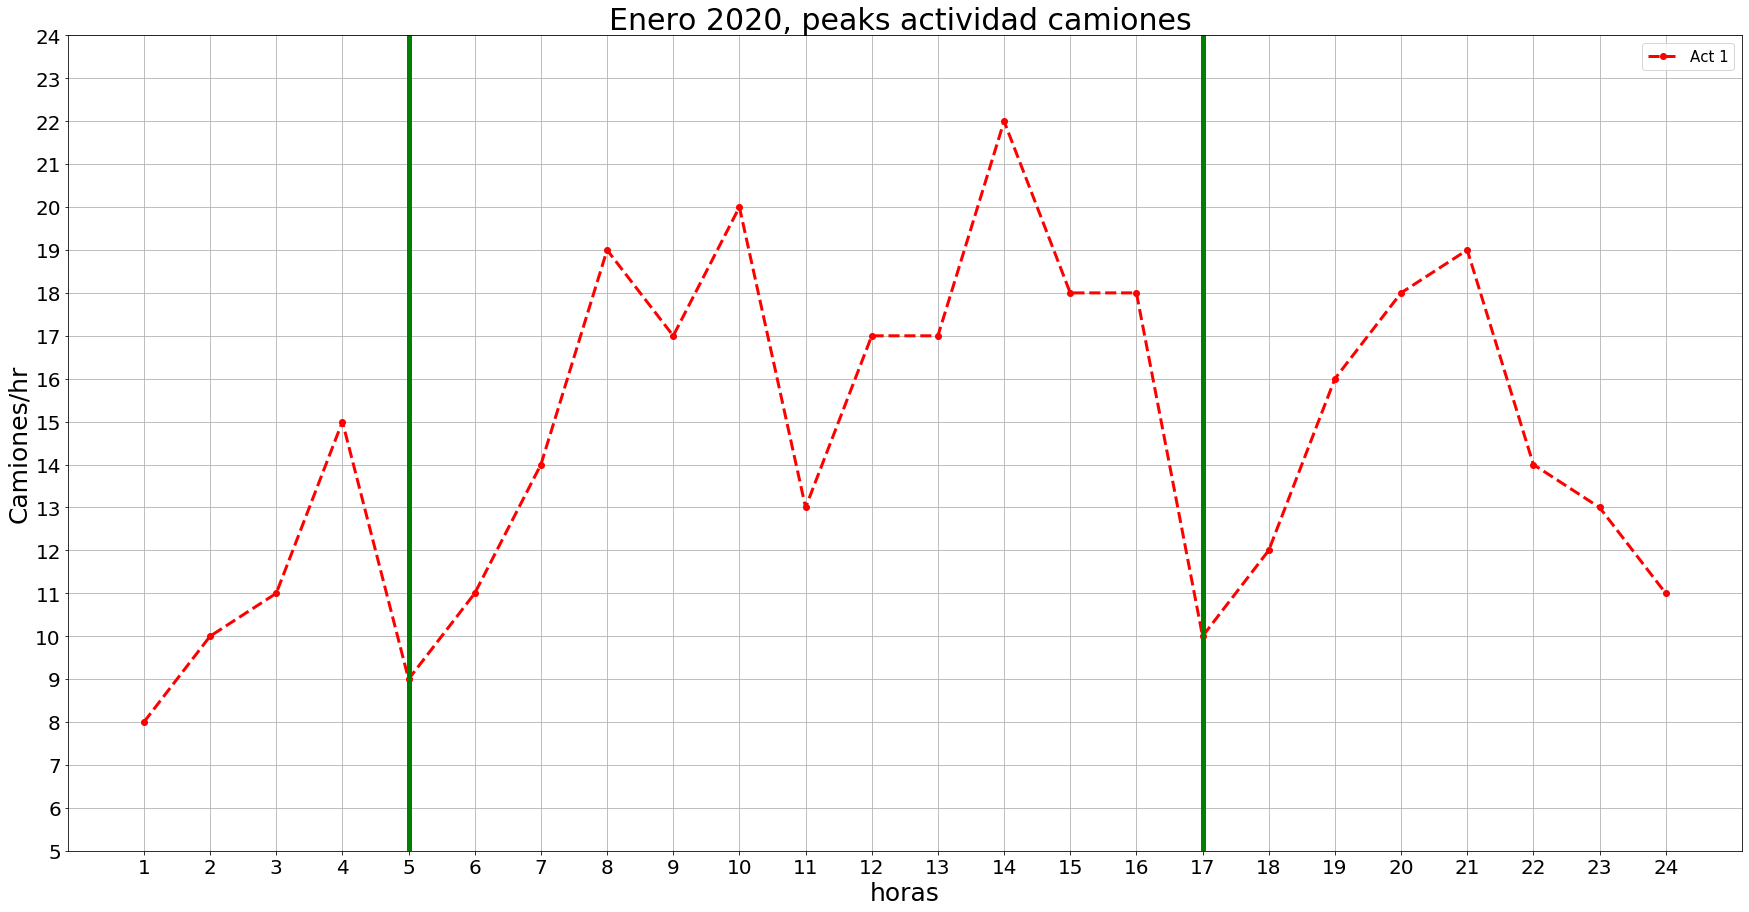

In [11]:
plt.figure(figsize=(30,15))
plt.plot(enero_peaks_act["C NPT3"],'ro--',lw=3,label='Act 1')
plt.title("Enero 2020, peaks actividad camiones ",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(5,25,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')
plt.legend(fontsize=15)
plt.grid(True)

plt.show()

__Esto nos indica que el análisis es correcto, dan resultados similares, solo se diferencian en la llegada y entrada de otro.__

Hilemos más fino, veamos por día

In [12]:
day_1_cola = analisis_por_dia(colas,1,1,1,25,None,condicion='end',metric='max')
day_1_act  = analisis_por_dia(actividad,1,1,1,25,None,condicion='end',metric='max')

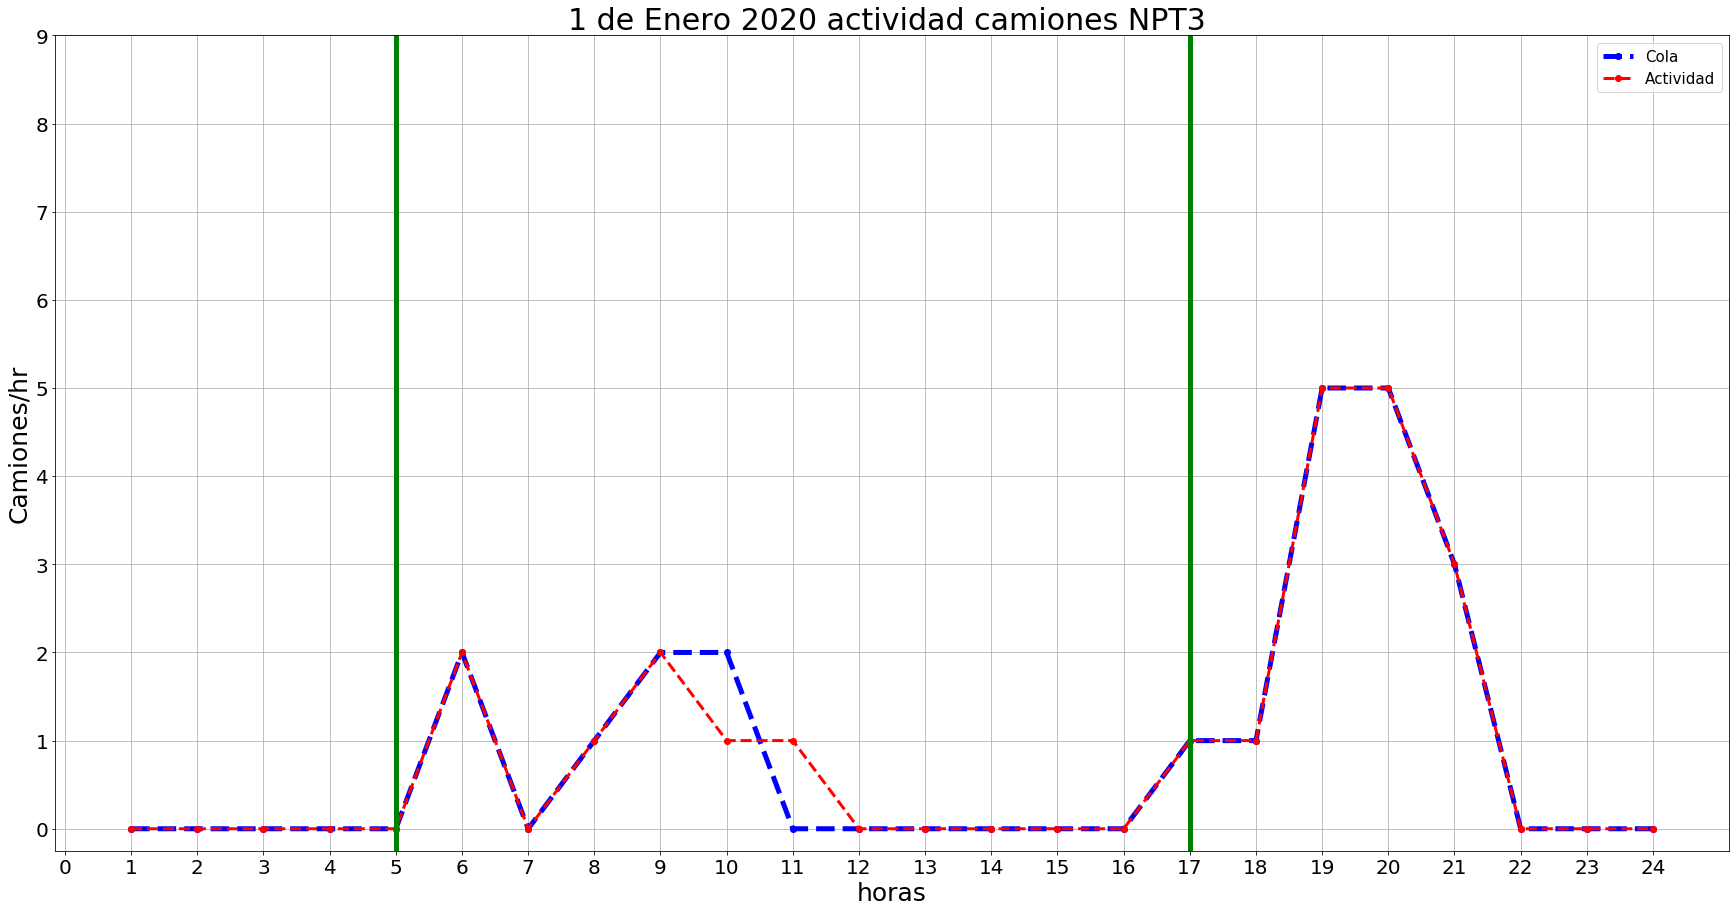

In [13]:
plt.figure(figsize=(30,15))
plt.plot(day_1_cola["C NPT3"],'bo--',lw=5,label='Cola')
plt.plot(day_1_act["C NPT3"],'ro--',lw=3,label='Actividad')
plt.title("1 de Enero 2020 actividad camiones NPT3 ",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(0,25,1),fontsize=20)
plt.yticks(np.arange(0,10,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [14]:
colas[(colas["Day of year [Out]"] == 1) & (colas["ZO"] == 'C NPT3')]

ID            Origin     Destination   Product      ZO  \
190740  13020701  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190741  12316312    Nueva Victoria        Coya Sur      SNIT  C NPT3   
190742  11332637  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190743  14829813    Nueva Victoria        Coya Sur      SNIT  C NPT3   
190744  14546381          Coya Sur  Nueva Victoria       NaN  C NPT3   
190745  13003279          Coya Sur  Nueva Victoria       NaN  C NPT3   
190746  13156702  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190747  12100064  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190748  13799347  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190749  12940654  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190750  12138776  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190751  11883935  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190752  13778013  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190753  12471248  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190754   8841538  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190755  13020734  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190756  13513795  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190757  13156725  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190758  13534329  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190759  14672682  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190760  12628172  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
190761  13904642  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   

                      Start Cola                  End Cola  date start  \
190740 2020-01-01 04:54:34-03:00 2020-01-01 05:42:04-03:00  2020-01-01   
190741 2020-01-01 05:12:06-03:00 2020-01-01 05:42:10-03:00  2020-01-01   
190742 2020-01-01 07:13:44-03:00 2020-01-01 07:31:40-03:00  2020-01-01   
190743 2020-01-01 07:58:36-03:00 2020-01-01 08:20:40-03:00  2020-01-01   
190744 2020-01-01 07:59:08-03:00 2020-01-01 08:43:03-03:00  2020-01-01   
190745 2020-01-01 09:22:00-03:00 2020-01-01 09:40:07-03:00  2020-01-01   
190746 2020-01-01 09:44:53-03:00 2020-01-01 09:56:54-03:00  2020-01-01   
190747 2020-01-01 16:01:15-03:00 2020-01-01 16:13:22-03:00  2020-01-01   
190748 2020-01-01 16:25:33-03:00 2020-01-01 17:34:48-03:00  2020-01-01   
190749 2020-01-01 16:39:01-03:00 2020-01-01 19:09:07-03:00  2020-01-01   
190750 2020-01-01 16:43:54-03:00 2020-01-01 18:00:55-03:00  2020-01-01   
190751 2020-01-01 16:51:44-03:00 2020-01-01 18:09:02-03:00  2020-01-01   
190752 2020-01-01 17:02:34-03:00 2020-01-01 18:18:42-03:00  2020-01-01   
190753 2020-01-01 17:03:20-03:00 2020-01-01 18:26:42-03:00  2020-01-01   
190754 2020-01-01 17:29:18-03:00 2020-01-01 18:34:53-03:00  2020-01-01   
190755 2020-01-01 17:55:57-03:00 2020-01-01 19:01:38-03:00  2020-01-01   
190756 2020-01-01 18:09:53-03:00 2020-01-01 19:26:39-03:00  2020-01-01   
190757 2020-01-01 18:28:34-03:00 2020-01-01 19:36:01-03:00  2020-01-01   
190758 2020-01-01 18:58:56-03:00 2020-01-01 20:10:07-03:00  2020-01-01   
190759 2020-01-01 19:07:09-03:00 2020-01-01 19:45:41-03:00  2020-01-01   
190760 2020-01-01 19:13:13-03:00 2020-01-01 20:17:04-03:00  2020-01-01   
190761 2020-01-01 20:23:21-03:00 2020-01-01 20:45:27-03:00  2020-01-01   

          date end time start  time end  Day of year [In]  Day of year [Out]  \
190740  2020-01-01   04:54:34  05:42:04                 1                  1   
190741  2020-01-01   05:12:06  05:42:10                 1                  1   
190742  2020-01-01   07:13:44  07:31:40                 1                  1   
190743  2020-01-01   07:58:36  08:20:40                 1                  1   
190744  2020-01-01   07:59:08  08:43:03                 1                  1   
190745  2020-01-01   09:22:00  09:40:07                 1                  1   
190746  2020-01-01   09:44:53  09:56:54                 1                  1   
190747  2020-0

In [15]:
actividad[(actividad["Day of year [Out]"] == 1) & (actividad["ZO"] == 'C NPT3')]

ID            Origin     Destination   Product      ZO  \
177377  13020701  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177378  12316312    Nueva Victoria        Coya Sur      SNIT  C NPT3   
177379  11332637  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177380  14829813    Nueva Victoria        Coya Sur      SNIT  C NPT3   
177381  14546381          Coya Sur  Nueva Victoria       NaN  C NPT3   
177382  13003279          Coya Sur  Nueva Victoria       NaN  C NPT3   
177383  13156702  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177384  12100064  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177385  13799347  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177386  12940654  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177387  12138776  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177388  11883935  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177389  13778013  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177390  12471248  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177391   8841538  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177392  13020734  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177393  13513795  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177394  13156725  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177395  13534329  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177396  14672682  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177397  12628172  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177398  13904642  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   

                       Start Act                   End Act  date start  \
177377 2020-01-01 05:42:04-03:00 2020-01-01 05:47:45-03:00  2020-01-01   
177378 2020-01-01 05:42:10-03:00 2020-01-01 05:48:10-03:00  2020-01-01   
177379 2020-01-01 07:31:40-03:00 2020-01-01 07:43:01-03:00  2020-01-01   
177380 2020-01-01 08:20:40-03:00 2020-01-01 08:25:42-03:00  2020-01-01   
177381 2020-01-01 08:43:03-03:00 2020-01-01 08:48:13-03:00  2020-01-01   
177382 2020-01-01 09:40:07-03:00 2020-01-01 09:45:07-03:00  2020-01-01   
177383 2020-01-01 09:56:54-03:00 2020-01-01 10:05:13-03:00  2020-01-01   
177384 2020-01-01 16:13:22-03:00 2020-01-01 16:20:34-03:00  2020-01-01   
177385 2020-01-01 17:34:48-03:00 2020-01-01 17:42:21-03:00  2020-01-01   
177386 2020-01-01 19:09:07-03:00 2020-01-01 19:19:40-03:00  2020-01-01   
177387 2020-01-01 18:00:55-03:00 2020-01-01 18:07:21-03:00  2020-01-01   
177388 2020-01-01 18:09:02-03:00 2020-01-01 18:16:36-03:00  2020-01-01   
177389 2020-01-01 18:18:42-03:00 2020-01-01 18:25:03-03:00  2020-01-01   
177390 2020-01-01 18:26:42-03:00 2020-01-01 18:32:58-03:00  2020-01-01   
177391 2020-01-01 18:34:53-03:00 2020-01-01 18:42:01-03:00  2020-01-01   
177392 2020-01-01 19:01:38-03:00 2020-01-01 19:07:50-03:00  2020-01-01   
177393 2020-01-01 19:26:39-03:00 2020-01-01 19:34:55-03:00  2020-01-01   
177394 2020-01-01 19:36:01-03:00 2020-01-01 19:44:38-03:00  2020-01-01   
177395 2020-01-01 20:10:07-03:00 2020-01-01 20:15:41-03:00  2020-01-01   
177396 2020-01-01 19:45:41-03:00 2020-01-01 19:54:06-03:00  2020-01-01   
177397 2020-01-01 20:17:04-03:00 2020-01-01 20:27:25-03:00  2020-01-01   
177398 2020-01-01 20:45:27-03:00 2020-01-01 20:51:30-03:00  2020-01-01   

          date end time start  time end  Day of year [In]  Day of year [Out]  \
177377  2020-01-01   05:42:04  05:47:45                 1                  1   
177378  2020-01-01   05:42:10  05:48:10                 1                  1   
177379  2020-01-01   07:31:40  07:43:01                 1                  1   
177380  2020-01-01   08:20:40  08:25:42                 1                  1   
177381  2020-01-01   08:43:03  08:48:13                 1                  1   
177382  2020-01-01   09:40:07  09:45:07                 1                  1   
177383  2020-01-01   09:56:54  10:05:13                 1                  1   
177384  2020-0

__AQui habian 4 datos__

In [16]:
colas[(colas["date end"] == datetime.date(2020,1,2)) & (colas["ZO"] == 'C NPT3')]

ID            Origin     Destination   Product      ZO  \
92925   12817919    Nueva Victoria        Coya Sur      SNIT  C NPT3   
93546   12636192         Tocopilla        Coya Sur       NaN  C NPT3   
93878   12636192         Tocopilla        Coya Sur       NaN  C NPT3   
94186   12636192         Tocopilla        Coya Sur       NaN  C NPT3   
190762  14839945  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
...          ...               ...             ...       ...     ...   
190833  11975374          Coya Sur  Nueva Victoria       NaN  C NPT3   
190834  11180342    Nueva Victoria        Coya Sur      SNIT  C NPT3   
190835  12261464    Nueva Victoria        Coya Sur      SNIT  C NPT3   
190836  12087185          Coya Sur  Nueva Victoria       NaN  C NPT3   
190837  14546565          Coya Sur  Nueva Victoria       NaN  C NPT3   

                      Start Cola                  End Cola  date start  \
92925  2020-01-02 14:36:26-03:00 2020-01-02 14:39:26-03:00  2020-01-02   
93546  2020-01-02 20:44:06-03:00 2020-01-02 20:56:42-03:00  2020-01-02   
93878  2020-01-02 21:12:47-03:00 2020-01-02 21:46:57-03:00  2020-01-02   
94186  2020-01-02 23:25:16-03:00 2020-01-02 23:36:04-03:00  2020-01-02   
190762 2020-01-02 02:19:56-03:00 2020-01-02 02:34:26-03:00  2020-01-02   
...                          ...                       ...         ...   
190833 2020-01-02 22:33:33-03:00 2020-01-02 22:49:58-03:00  2020-01-02   
190834 2020-01-02 22:44:53-03:00 2020-01-02 23:01:12-03:00  2020-01-02   
190835 2020-01-02 23:06:51-03:00 2020-01-02 23:19:27-03:00  2020-01-02   
190836 2020-01-02 23:25:15-03:00 2020-01-02 23:44:19-03:00  2020-01-02   
190837 2020-01-02 23:40:59-03:00 2020-01-02 23:53:03-03:00  2020-01-02   

          date end time start  time end  Day of year [In]  Day of year [Out]  \
92925   2020-01-02   14:36:26  14:39:26                 2                  2   
93546   2020-01-02   20:44:06  20:56:42                 2                  2   
93878   2020-01-02   21:12:47  21:46:57                 2                  2   
94186   2020-01-02   23:25:16  23:36:04                 2                  2   
190762  2020-01-02   02:19:56  02:34:26                 2                  2   
...            ...        ...       ...               ...                ...   
190833  2020-01-02   22:33:33  22:49:58                 2                  2   
190834  2020-01-02   22:44:53  23:01:12                 2                  2   
190835  2020-01-02   23:06:51  23:19:27                 2                  2   
190836  2020-01-02   23:25:15  23:44:19                 2                  2   
190837  2020-01-02   23:40:59  23:53:03                 2                  2   

        time cola  
92925       180.0  
93546       756.0  
93878      2050.0  
94186       648.0  
190762      870.0  
...           ...  
190833      985.0  
190834      979.0  
190835      756.0  
190836     1144.0  
190837      724.0  

[80 rows x 14 columns]

__AQui habian 80 datos__

In [17]:
actividad[(actividad["Day of year [Out]"] == 2) & (actividad["ZO"] == 'C NPT3')]

ID            Origin     Destination   Product      ZO  \
177399  14839945  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177400  11310469  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177401  12329736  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177402  14201246  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
177403  12336430  Salar de Atacama        Coya Sur  MOP-H-BL  C NPT3   
...          ...               ...             ...       ...     ...   
177474  14546565          Coya Sur  Nueva Victoria       NaN  C NPT3   
197148  12817919    Nueva Victoria        Coya Sur      SNIT  C NPT3   
197769  12636192         Tocopilla        Coya Sur       NaN  C NPT3   
198101  12636192         Tocopilla        Coya Sur       NaN  C NPT3   
198409  12636192         Tocopilla        Coya Sur       NaN  C NPT3   

                       Start Act                   End Act  date start  \
177399 2020-01-02 02:34:26-03:00 2020-01-02 02:39:29-03:00  2020-01-02   
177400 2020-01-02 03:41:46-03:00 2020-01-02 03:50:47-03:00  2020-01-02   
177401 2020-01-02 03:58:44-03:00 2020-01-02 04:06:55-03:00  2020-01-02   
177402 2020-01-02 03:08:16-03:00 2020-01-02 03:17:31-03:00  2020-01-02   
177403 2020-01-02 03:29:01-03:00 2020-01-02 03:37:11-03:00  2020-01-02   
...                          ...                       ...         ...   
177474 2020-01-02 23:53:03-03:00 2020-01-02 23:57:04-03:00  2020-01-02   
197148 2020-01-02 14:39:26-03:00 2020-01-02 14:45:00-03:00  2020-01-02   
197769 2020-01-02 20:56:42-03:00 2020-01-02 21:05:45-03:00  2020-01-02   
198101 2020-01-02 21:46:57-03:00 2020-01-02 21:52:58-03:00  2020-01-02   
198409 2020-01-02 23:36:04-03:00 2020-01-02 23:42:50-03:00  2020-01-02   

          date end time start  time end  Day of year [In]  Day of year [Out]  \
177399  2020-01-02   02:34:26  02:39:29                 2                  2   
177400  2020-01-02   03:41:46  03:50:47                 2                  2   
177401  2020-01-02   03:58:44  04:06:55                 2                  2   
177402  2020-01-02   03:08:16  03:17:31                 2                  2   
177403  2020-01-02   03:29:01  03:37:11                 2                  2   
...            ...        ...       ...               ...                ...   
177474  2020-01-02   23:53:03  23:57:04                 2                  2   
197148  2020-01-02   14:39:26  14:45:00                 2                  2   
197769  2020-01-02   20:56:42  21:05:45                 2                  2   
198101  2020-01-02   21:46:57  21:52:58                 2                  2   
198409  2020-01-02   23:36:04  23:42:50                 2                  2   

        time Act  
177399     303.0  
177400     541.0  
177401     491.0  
177402     555.0  
177403     490.0  
...          ...  
177474     241.0  
197148     334.0  
197769     543.0  
198101     361.0  
198409     406.0  

[80 rows x 14 columns]

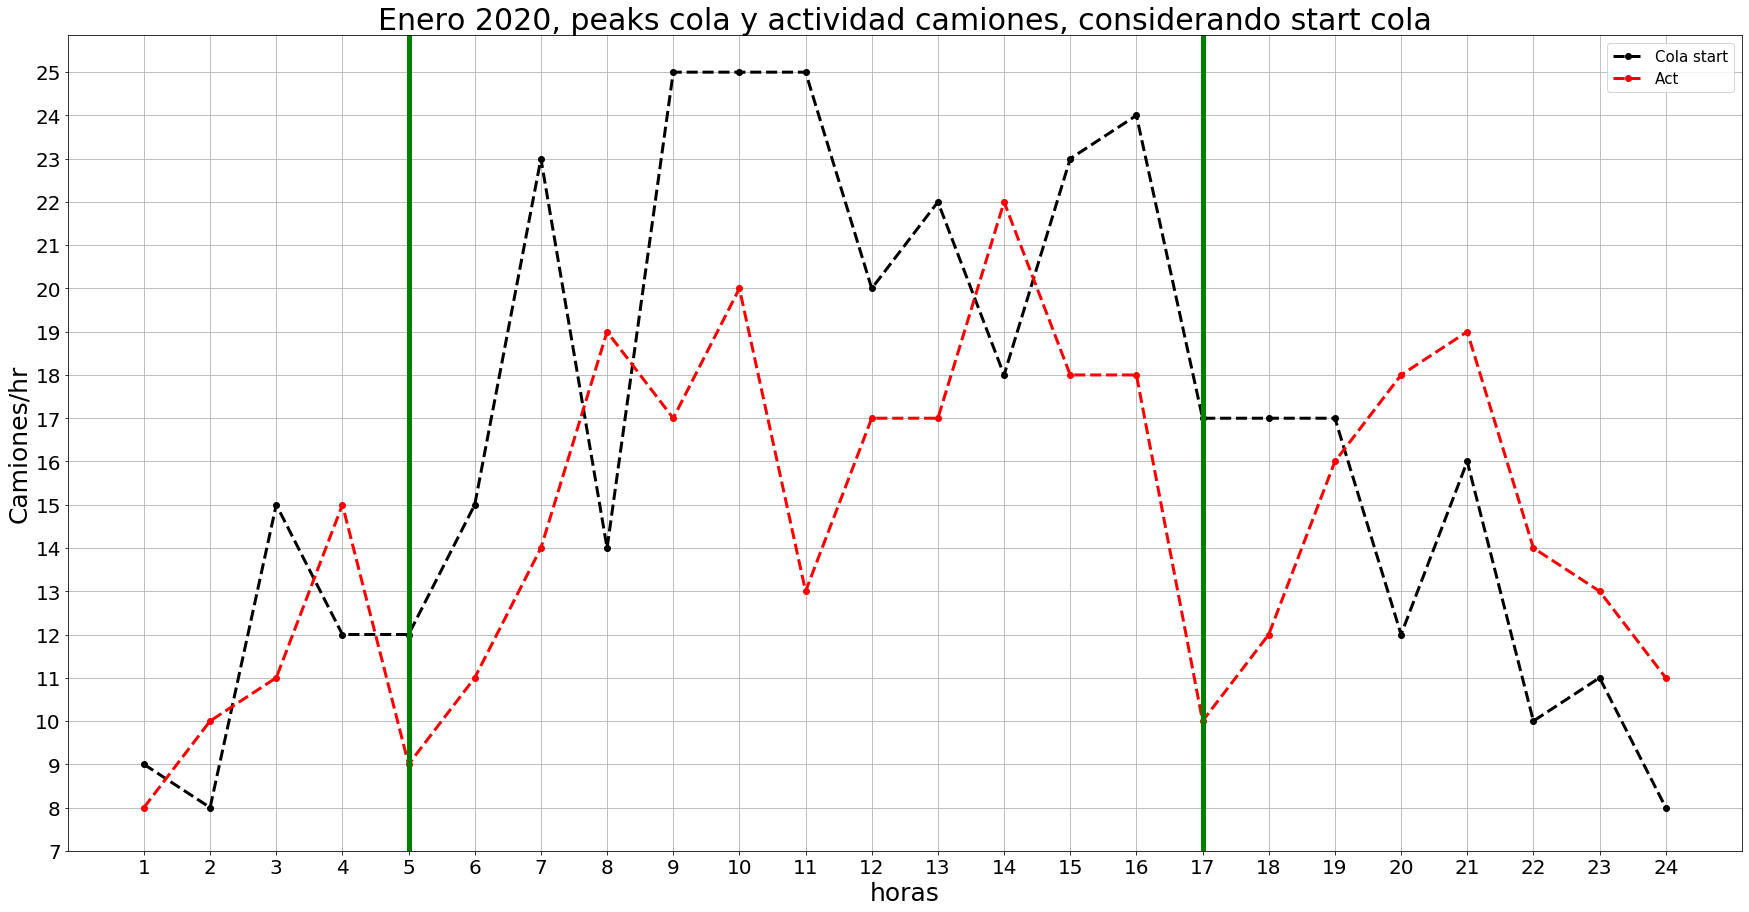

In [18]:
plt.figure(figsize=(30,15))
# plt.plot(enero_peaks_cola["C NPT3"],'bo--',lw=3,label='Cola end')
plt.plot(enero_peaks_cola_start["C NPT3"],'ko--',lw=3,label='Cola start')
plt.plot(enero_peaks_act["C NPT3"],'ro--',lw=3,label='Act')
plt.title("Enero 2020, peaks cola y actividad camiones, considerando start cola",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(7,26,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')

#plt.fill_between((4,6), 0, 11,color='gray', alpha=0.3)
plt.legend(fontsize=15)
plt.grid(True)
#plt.fill_between((16,18), 0, 11,color='gray', alpha=0.3)
#plt.savefig("Analisis_enero_prom.png")
plt.show()

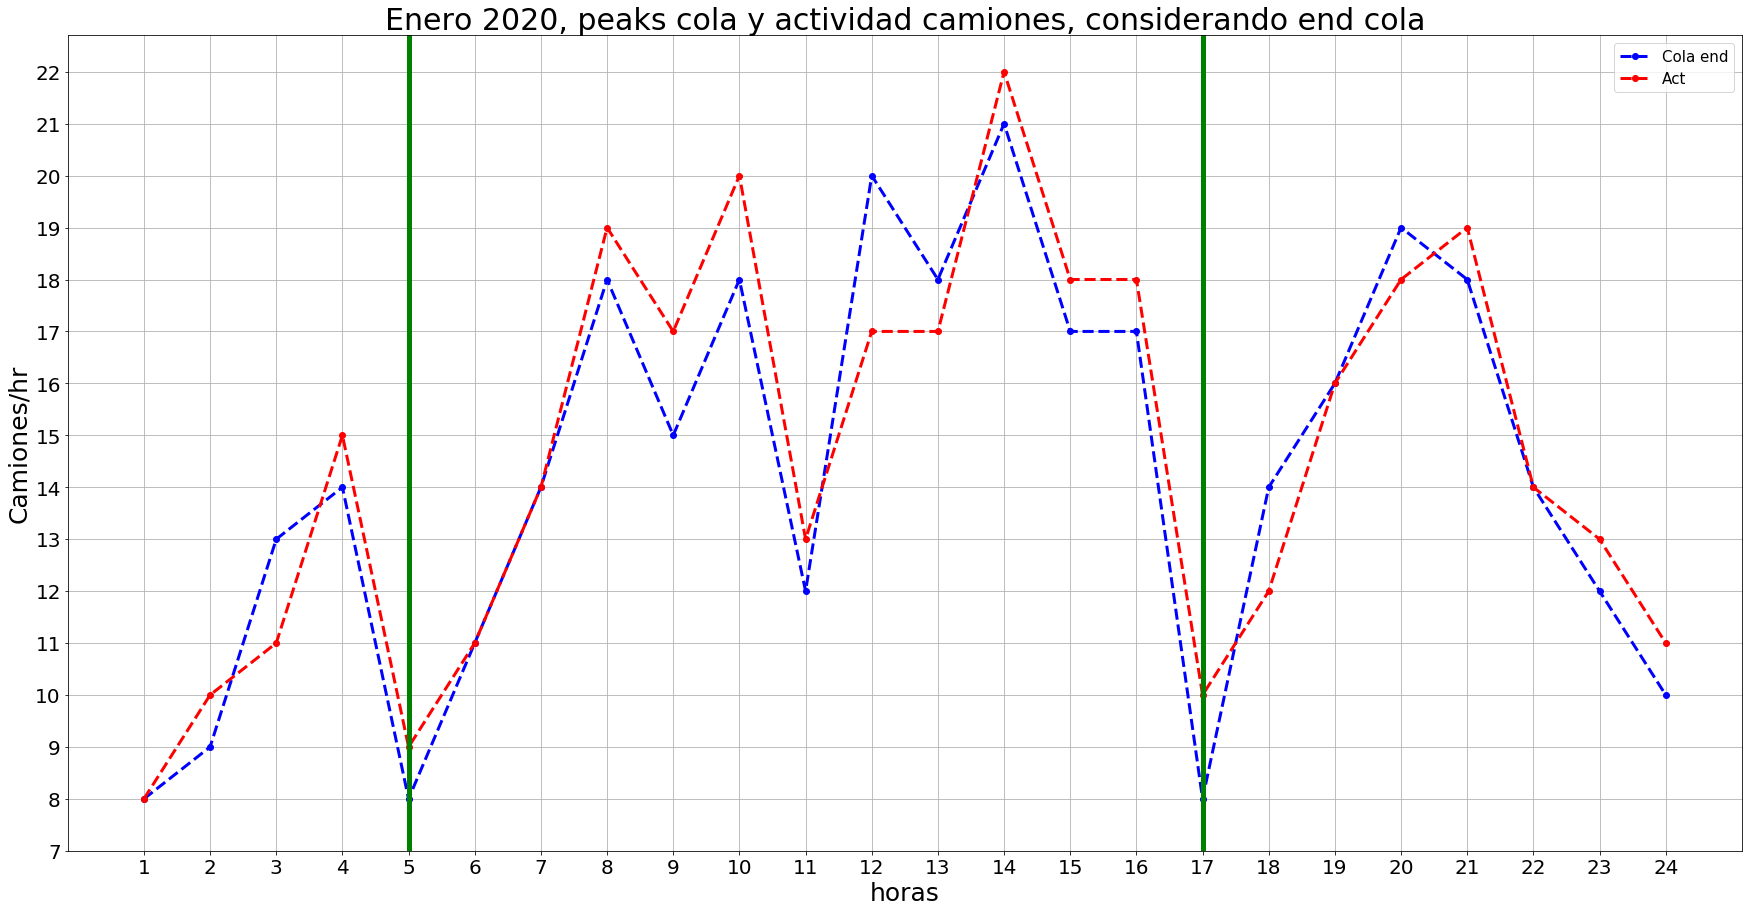

In [19]:
plt.figure(figsize=(30,15))
plt.plot(enero_peaks_cola["C NPT3"],'bo--',lw=3,label='Cola end')
#plt.plot(enero_peaks_cola_start["C NPT3"],'ko--',lw=3,label='Cola start')
plt.plot(enero_peaks_act["C NPT3"],'ro--',lw=3,label='Act')
plt.title("Enero 2020, peaks cola y actividad camiones, considerando end cola",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(7,23,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')

#plt.fill_between((4,6), 0, 11,color='gray', alpha=0.3)
plt.legend(fontsize=15)
plt.grid(True)
#plt.fill_between((16,18), 0, 11,color='gray', alpha=0.3)
plt.savefig("Analisis_enero_peaks_cola_act.png")
plt.show()

In [20]:
#enero_peaks_cola = analisis_por_dia(colas,1,31,1,25,None,condicion='end',metric='max')
#enero_peaks_cola_start = analisis_por_dia(colas,1,31,1,25,None,condicion='start',metric='max')
#enero_mean_cola = analisis_por_dia(colas,1,31,1,25,None,condicion='end',metric='mean')
#enero_peaks_act = analisis_por_dia(actividad,1,31,1,25,None,condicion='end',metric='max')
enero_peaks_act_start = analisis_por_dia(actividad,1,31,1,25,None,condicion='start',metric='max')

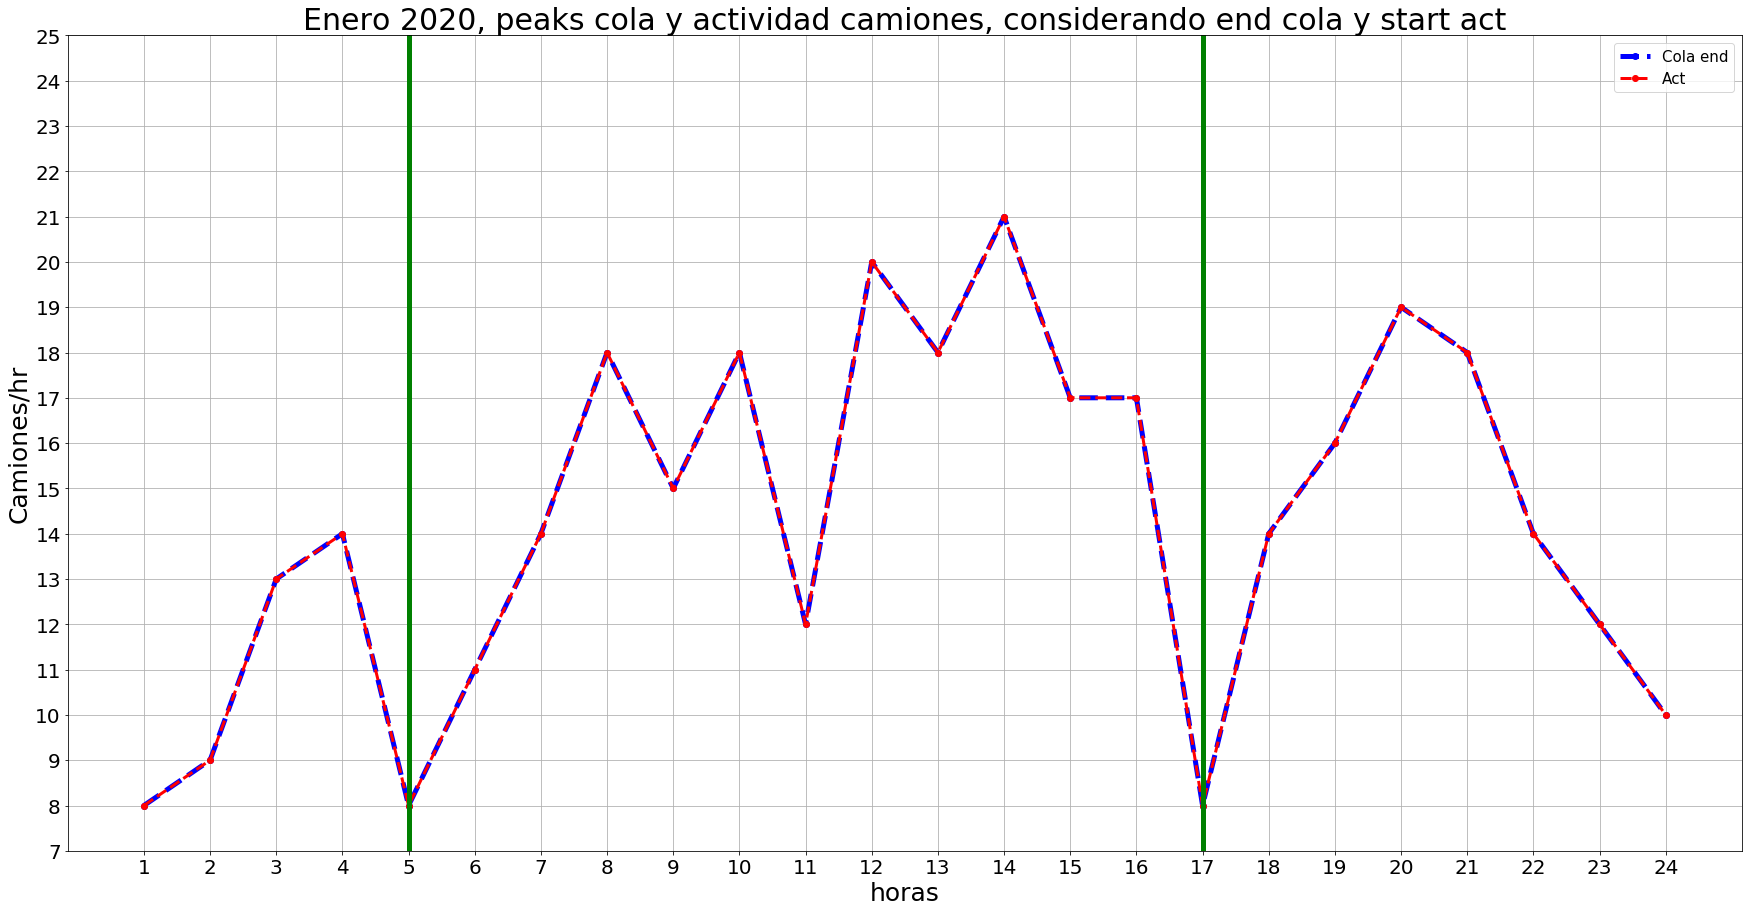

In [21]:
plt.figure(figsize=(30,15))
plt.plot(enero_peaks_cola["C NPT3"],'bo--',lw=5,label='Cola end')
#plt.plot(enero_peaks_cola_start["C NPT3"],'ko--',lw=3,label='Cola start')
plt.plot(enero_peaks_act_start["C NPT3"],'ro--',lw=3,label='Act')
plt.title("Enero 2020, peaks cola y actividad camiones, considerando end cola y start act",fontsize=30)
plt.xlabel("horas",fontsize=25)
plt.ylabel("Camiones/hr",fontsize=25)
plt.xticks(np.arange(1,25,1),fontsize=20)
plt.yticks(np.arange(7,26,1),fontsize=20)
plt.axvline(x=17,lw=5,c='g')
plt.axvline(x=5,lw=5,c='g')

#plt.fill_between((4,6), 0, 11,color='gray', alpha=0.3)
plt.legend(fontsize=15)
plt.grid(True)
#plt.fill_between((16,18), 0, 11,color='gray', alpha=0.3)
#plt.savefig("Analisis_enero_prom.png")
plt.show()

__no podemos tomar las colas end y colas start ya que son el mismo dato, debemos tomar las actividad end y colas end.__

NameError: name 'enero_peaks_act_start' is not defined